In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from PIL import Image

In [3]:
import os

In [10]:
os.listdir()

['Anren_crimson_cyborg_dark_colored_enigmatic_311065aa-bfed-4dcc-9cdc-6adf2ab31474.png',
 'Anren_dark_crimson_scarlett_horror_898e31c9-9e84-4e9c-868d-c655388e7fc2.png']

In [84]:
img = np.array(Image.open('Anren_crimson_cyborg_dark_colored_enigmatic_311065aa-bfed-4dcc-9cdc-6adf2ab31474.png')).mean(2)

In [128]:
torch_img = torch.tensor(torch_img, dtype=torch.float32)

C:\Users\An_asus\AppData\Local\Temp/ipykernel_18336/988359642.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_img = torch.tensor(torch_img, dtype=torch.float32)


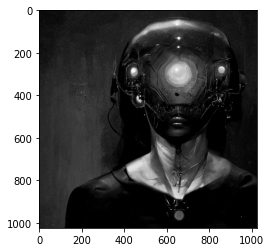

In [95]:
plt.imshow(img, cmap='gray')

In [47]:
def image_gradient_vector(img, x, y):
    return np.array([img[x+1, y, :]-img[x-1, y, :], img[x, y+1, :]-img[x, y-1, :]])

In [54]:
v = image_gradient_vector(img, 222, 452)

In [75]:
np.linalg.norm(v)

440.5837037385745

In [77]:
import torch

In [78]:
from torch import nn

In [96]:
igv_conv = nn.Conv2d(1, 1, kernel_size=[3, 3], padding='same', bias=False)

In [100]:
igv_conv.weight.shape

torch.Size([1, 1, 3, 3])

In [145]:
mat = [[0.0, 1.0, 0.0],
       [-1.0, 0.0, 1.0],
       [0.0, -1.0, 0.0]]

In [154]:
mat = [[-1.0, 0.0, 1.0],
       [-1.0, 0.0, 1.0],
       [-1.0, 0.0, 1.0]]

In [159]:
mat = [[1.0, 1.0, 1.0],
       [0.0, 0.0, 0.0],
       [-1.0, -1.0, -1.0]]

In [164]:
mat = [[1.0, 2.0, 1.0],
       [0.0, 0.0, 0.0],
       [-1.0, -2.0, -1.0]]

In [169]:
mat = [[-1.0, 0.0, 1.0],
       [-2.0, 0.0, 2.0],
       [-1.0, 0.0, 1.0]]

In [170]:
igv_conv.weight = torch.nn.Parameter(torch.tensor([[mat]]))

In [171]:
generated_igv_img = igv_conv.forward(torch_img)

In [172]:
generated_igv_img.squeeze_(0).squeeze_(0)

tensor([[ 37.3333,   3.6667, -13.0000,  ...,  -4.3333,  -1.3333, -40.3333],
        [ 36.3333,   8.3333,   0.3333,  ...,  -3.0000,   7.6667, -61.3333],
        [ 27.0000,  13.0000,  13.0000,  ...,  -5.6667,   4.6667, -65.3333],
        ...,
        [108.6667,   4.0000,   5.6667,  ...,   0.3333,   0.3333,  -0.3333],
        [113.0000,   1.3333,   0.3333,  ...,   1.3333,   1.0000,  -1.3333],
        [ 87.0000,  -1.3333,  -6.3333,  ...,   1.6667,   1.0000,  -1.6667]],
       grad_fn=<SqueezeBackward3>)

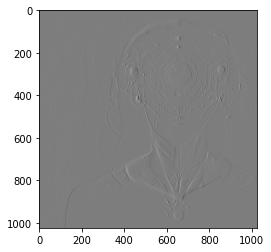

In [173]:
plt.imshow(generated_igv_img.detach(), cmap='gray')

In [174]:
import scipy
import scipy.signal as sig